In [130]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Exercise 1: Clustering Method

In this exercise we will explore how each clustering algorithm discussed in the class works. 

## Load Dataset

The dataset that we will use is a customer transaction in a certain mall. In this dataset there will 4 features including Gender, Age, Annual Income, and Spending Score. You can get the dataset from https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Mall_Customers.csv

In [131]:
# load dataset and show the first five sample
df = pd.read_csv('https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [132]:
# describe data
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Data Preprocessing

For this case study, we only use income and spending score 

In [133]:
# create new dataframe that consist only annual income and spending score
df = df[['Annual Income (k$)', 'Spending Score (1-100)']]
df = df.rename(columns={'Annual Income (k$)': 'income', 'Spending Score (1-100)': 'score'})
df.head()

,income,score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Before we analyze our data, we need to scale the data with standardization method

In [134]:
# scale dataset with standard scaler
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df2 = df[['income', 'score']]
df[['income', 'score']] = sc.fit_transform(df[['income', 'score']])
print(df)

       income     score
0   -1.738999 -0.434801
1   -1.738999  1.195704
2   -1.700830 -1.715913
3   -1.700830  1.040418
4   -1.662660 -0.395980
..        ...       ...
195  2.268791  1.118061
196  2.497807 -0.861839
197  2.497807  0.923953
198  2.917671 -1.250054
199  2.917671  1.273347

[200 rows x 2 columns]


In [135]:
# get stastical information on the new dataset
df.describe()

,income,score
count,2.000000e+02,2.000000e+02
mean,-2.131628e-16,-1.465494e-16
std,1.002509e+00,1.002509e+00
min,-1.738999e+00,-1.910021e+00
25%,-7.275093e-01,-5.997931e-01
50%,3.587926e-02,-7.764312e-03
75%,6.656748e-01,8.851316e-01
max,2.917671e+00,1.894492e+00


Then, we check the inisial position for our sample. You may use pairplot or scattered chart for the visualization option.

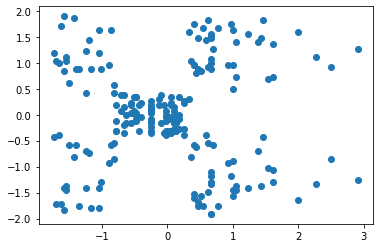

In [136]:
# Visualize the position 
plt.plot(df['income'], df['score'], 'o')

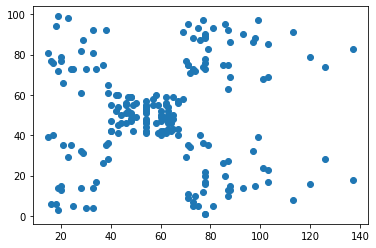

In [137]:
# Visualize the position using the original scale
plt.plot(df2['income'], df2['score'], 'o')

## Clustering

### K-Means Algorithm

For using KMeans clustering algorithm, you need to define the number of cluster, initialization number, number of iteration, and random state.

In this case study, the below parameter settings is used:
- centroid initialization: random
- number of cluster: 5
- number of iteration: 300
- random state: 42

In [138]:
# assign cluster with K-Means algorithm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

labels = KMeans(init='random', n_clusters=5, max_iter=100, random_state=42).fit_predict(df)

Visualize your result based on income and spending. You also can show the final position of the centroid.

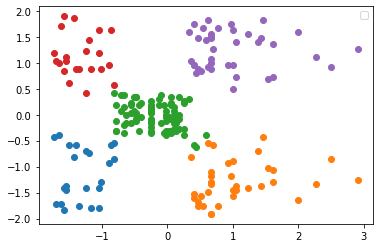

In [139]:
# visualize the result using scater chart
df['label'] = labels
unique_labels = np.unique(labels)

for i in unique_labels:
    plt.scatter(df[df.label == i]['income'], df[df.label == i]['score'])
plt.legend()
plt.show()

The evaluation for chosing the number of K in KMEANS can be done by several methods such as elbow method and silhouette score

1. using elbow method

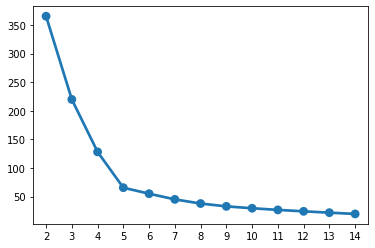

In [140]:
# set the parameter for evaluating K
import seaborn as sns

clusters_range = range(2, 15)
inertias = []

for i in clusters_range:
  kmeans = KMeans(init = 'k-means++', n_clusters = i, n_init = 100, random_state = 0).fit(df)
  inertias.append(kmeans.inertia_)

# check the inertia for each K
sns.pointplot(x = list(clusters_range), y = list(inertias))



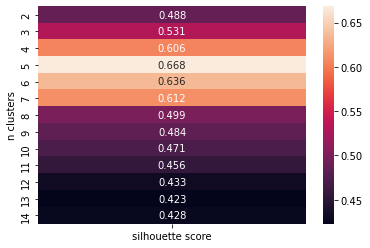

In [141]:
# manually visualize the elbow method using plotlib
results = []

for i in clusters_range:
  labels = KMeans(init = 'k-means++', n_clusters = i, n_init = 100, random_state = 0).fit_predict(df)
  avg = silhouette_score(df, labels)
  results.append([i, avg])

result = pd.DataFrame(results, columns = ['n clusters', 'silhouette score'])
pivot = pd.pivot_table(result, index = 'n clusters', values = 'silhouette score')

sns.heatmap(pivot, annot = True, fmt = '.3f')

In [144]:
# using kneelocator to find the elbow/knee
from kneed import KneeLocator

kl = KneeLocator(clusters_range, inertias, curve="convex", direction="decreasing")
kl.elbow

5